# Import important Libraries

In [1]:
# Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATA

In [2]:
df=pd.read_csv("Data file.csv")
df

,Sl no,"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}",mobile number of user,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,...,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Average payback time in days over last 30 days,Average payback time in days over last 90 days,telecom circle,date
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10/08/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06/06/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,6/17/2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12/06/2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,7/29/2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,7/25/2016


In [3]:
#Checking Shape
df.shape

(209593, 37)

In [4]:
#Checking DatatTypes
df.dtypes

Sl no                                                                                                                     int64
Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}      int64
mobile number of user                                                                                                    object
age on cellular network in days                                                                                         float64
Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)                                 float64
Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)                                 float64
Average main account balance over last 30 days                                                                          float64
Average main account balance over last 90 days                                                          

In [5]:
#Checking Unique Values for the data
print("Distince values of each columns")
for column in df:
    print(f'-{column}:{df[column].unique()}')

Distince values of each columns
-Sl no:[     1      2      3 ... 209591 209592 209593]
-Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}:[0 1]
-mobile number of user:['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
-age on cellular network in days:[2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]
-Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah):[ 3055.05    12122.       1398.      ... 11843.11167 12488.22833
  4489.362  ]
-Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah):[ 3065.15      12124.75       1398.        ...   151.8723333 12574.37
  4534.82     ]
-Average main account balance over last 30 days:[ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]
-Average main account balance over last 90 days:[ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58

-Median of amounts of loan taken by the user in last 30 days:[0.  1.  0.5 2.  1.5 3. ]
-Number of loans taken by user in last 90 days:[2.00000000e+00 1.00000000e+00 7.00000000e+00 ... 3.02706822e+03
 4.47977118e+03 2.04790245e+03]
-Total amount of loans taken by user in last 90 days:[ 12   6  42  18  24  30  48 108  36  60  78  54  72   0 204 162  84 132
  66  90 102 300 138 168  96 114 156 120 126 144 180 198 174 216 192 276
 150 234 228 312 222 384 186 240 252 408 288 210 306 354 258 270 396 246
 342 264 378 426 294 438 330 318 360 324 348 372 282 402 336]
-maximum amount of loan taken by the user in last 90 days:[ 6 12  0]
-Median of amounts of loan taken by the user in last 90 days:[0.  1.  0.5 2.  1.5 3. ]
-Average payback time in days over last 30 days:[29.          0.          2.33333333 ... 56.75       64.33333333
  5.61538461]
-Average payback time in days over last 90 days:[29.          0.          2.33333333 ... 64.33333333  5.23529412
 25.84615385]
-telecom circle:['UPW']
-

In [6]:
df.nunique()

Sl no                                                                                                                   209593
Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}         2
mobile number of user                                                                                                   186243
age on cellular network in days                                                                                           4507
Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)                                 146328
Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)                                 155483
Average main account balance over last 30 days                                                                          131338
Average main account balance over last 90 days                                                                 

In [7]:
#Checking data
df.head().T

,0,1,2,3,4
Sl no,1,2,3,4,5
"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}",0,1,1,1,1
mobile number of user,21408I70789,76462I70374,17943I70372,55773I70781,03813I82730
age on cellular network in days,272,712,535,241,947
"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)",3055.05,12122,1398,21.228,150.619
"Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",3065.15,12124.8,1398,21.228,150.619
Average main account balance over last 30 days,220.13,3691.26,900.13,159.42,1098.9
Average main account balance over last 90 days,260.13,3691.26,900.13,159.42,1098.9
Number of days till last recharge of main account,2,20,3,41,4
Number of days till last recharge of data account,0,0,0,0,0


# EXPLORATORY DATA ANALYSIS

In [8]:
#Checking Null Values
x=df.isnull().sum()
x

Sl no                                                                                                                   0
Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}    0
mobile number of user                                                                                                   0
age on cellular network in days                                                                                         0
Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)                                 0
Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)                                 0
Average main account balance over last 30 days                                                                          0
Average main account balance over last 90 days                                                                          0
Number of days till last

<AxesSubplot:>

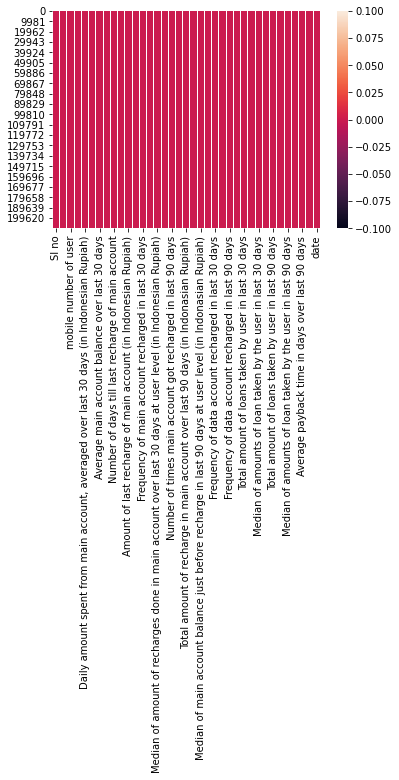

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,Sl no,"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}",age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Amount of last recharge of main account (in Indonesian Rupiah),...,Number of loans taken by user in last 30 days,Total amount of loans taken by user in last 30 days,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Average payback time in days over last 30 days,Average payback time in days over last 90 days
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [11]:
#Droping Unnecessary Columns and converting the data columns into months and day for further analysis
df=df.drop(df.columns[0], axis=1)
df=df.drop(df.columns[34], axis=1)
df["month"] = df['date'].str.split('/').str[0].astype(int)
df["day"] = df['date'].str.split('/').str[1].astype(int)
df.drop(["date"], axis = 1, inplace = True)

In [12]:
df

,"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}",mobile number of user,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Amount of last recharge of main account (in Indonesian Rupiah),...,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Average payback time in days over last 30 days,Average payback time in days over last 90 days,month,day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [13]:
#Converting the negative data into positive
num = df._get_numeric_data()
num[num < 0] = 0
df

,"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}",mobile number of user,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Amount of last recharge of main account (in Indonesian Rupiah),...,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Average payback time in days over last 30 days,Average payback time in days over last 90 days,month,day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


# DATA VISUALIZATION

Text(0.5, 1.0, 'user paid back the credit amount within 5 days of issuing the loan')

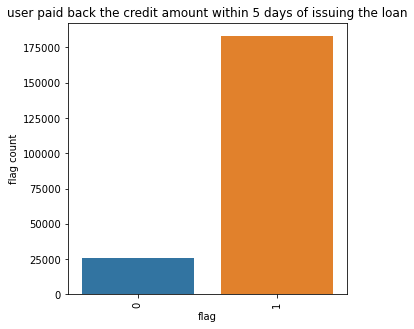

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x="Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}",data=df)
plt.xticks(rotation = 90)
plt.xlabel("flag")
plt.ylabel("flag count")
plt.title('user paid back the credit amount within 5 days of issuing the loan')

<AxesSubplot:xlabel='Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}', ylabel='Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)'>

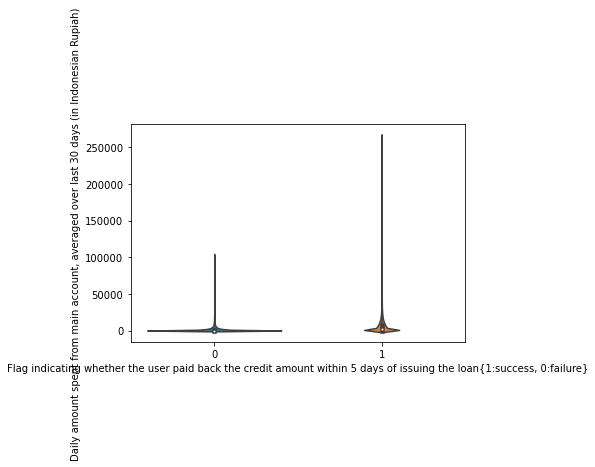

In [15]:
sns.violinplot(x="Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}",y="Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)",data=df)

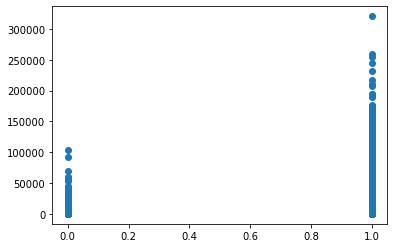

In [16]:
plt.scatter(df["Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}"],df["Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)"])

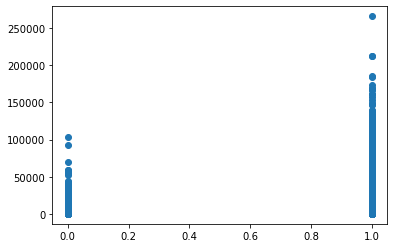

In [17]:
plt.scatter(df["Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}"],df["Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)"])

<AxesSubplot:xlabel='Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)', ylabel='Count'>

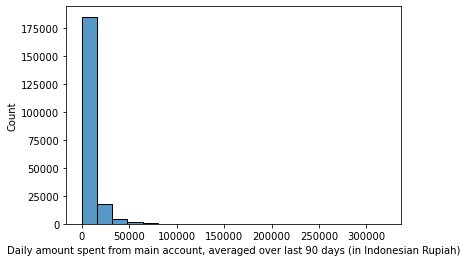

In [18]:
sns.histplot(df['Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)'],bins=20)

<AxesSubplot:xlabel='Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)', ylabel='Count'>

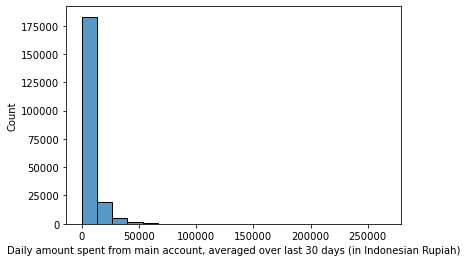

In [19]:
sns.histplot(df['Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)'],bins=20)

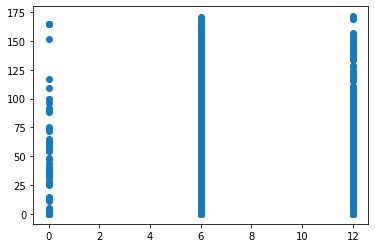

In [20]:
plt.scatter(x='maximum amount of loan taken by the user in last 90 days', y='Average payback time in days over last 90 days', data=df)

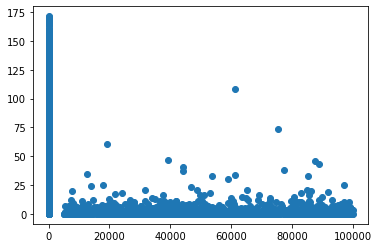

In [21]:
plt.scatter(x='maximum amount of loan taken by the user in last 30 days', y='Average payback time in days over last 30 days', data=df)

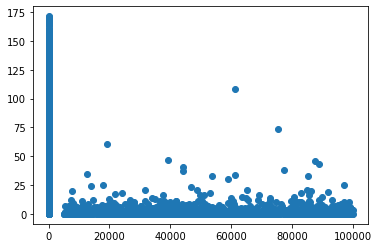

In [22]:
plt.scatter(x='maximum amount of loan taken by the user in last 30 days', y='Average payback time in days over last 30 days', data=df)

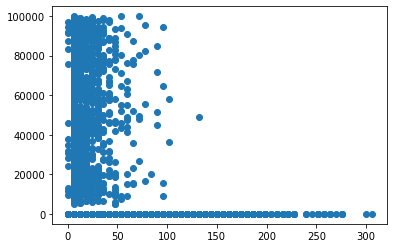

In [23]:
plt.scatter(x='Total amount of loans taken by user in last 30 days', y='Number of times data account got recharged in last 30 days', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '(0, 10000]'),
  Text(1, 0, '(10000, 20000]'),
  Text(2, 0, '(20000, 30000]'),
  Text(3, 0, '(30000, 40000]'),
  Text(4, 0, '(40000, 50000]'),
  Text(5, 0, '(50000, 60000]'),
  Text(6, 0, '(60000, 70000]'),
  Text(7, 0, '(70000, 80000]'),
  Text(8, 0, '(80000, 90000]'),
  Text(9, 0, '(90000, 100000]'),
  Text(10, 0, '(100000, 110000]'),
  Text(11, 0, '(110000, 120000]')])

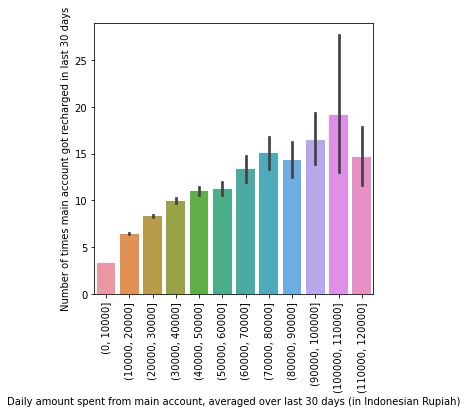

In [24]:
f,ax=plt.subplots(figsize=(5,5))
df1=pd.cut(x=df["Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)"],bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000])
sns.barplot(x=df1, y=df["Number of times main account got recharged in last 30 days"] )
plt.xticks(rotation=90)

In [25]:
df.describe()

,"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}",age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Amount of last recharge of main account (in Indonesian Rupiah),Number of times main account got recharged in last 30 days,...,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Average payback time in days over last 30 days,Average payback time in days over last 90 days,month,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.576081,5381.416791,6082.529604,2703.979234,3496.451841,3755.986822,3712.203861,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.612253,14.584008
std,0.330519,75696.057541,9220.614929,10918.804663,4299.241981,5760.545289,53905.882512,53374.833364,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,2.371940,7.953396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,8.000000,21.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,...,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,12.000000,31.000000


array([[<AxesSubplot:title={'center':'Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}'}>,
        <AxesSubplot:title={'center':'age on cellular network in days'}>,
        <AxesSubplot:title={'center':'Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)'}>,
        <AxesSubplot:title={'center':'Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)'}>,
        <AxesSubplot:title={'center':'Average main account balance over last 30 days'}>,
        <AxesSubplot:title={'center':'Average main account balance over last 90 days'}>],
       [<AxesSubplot:title={'center':'Number of days till last recharge of main account'}>,
        <AxesSubplot:title={'center':'Number of days till last recharge of data account'}>,
        <AxesSubplot:title={'center':'Amount of last recharge of main account (in Indonesian Rupiah)'}>,
        <AxesSubplot:>, <AxesSubplot:>,

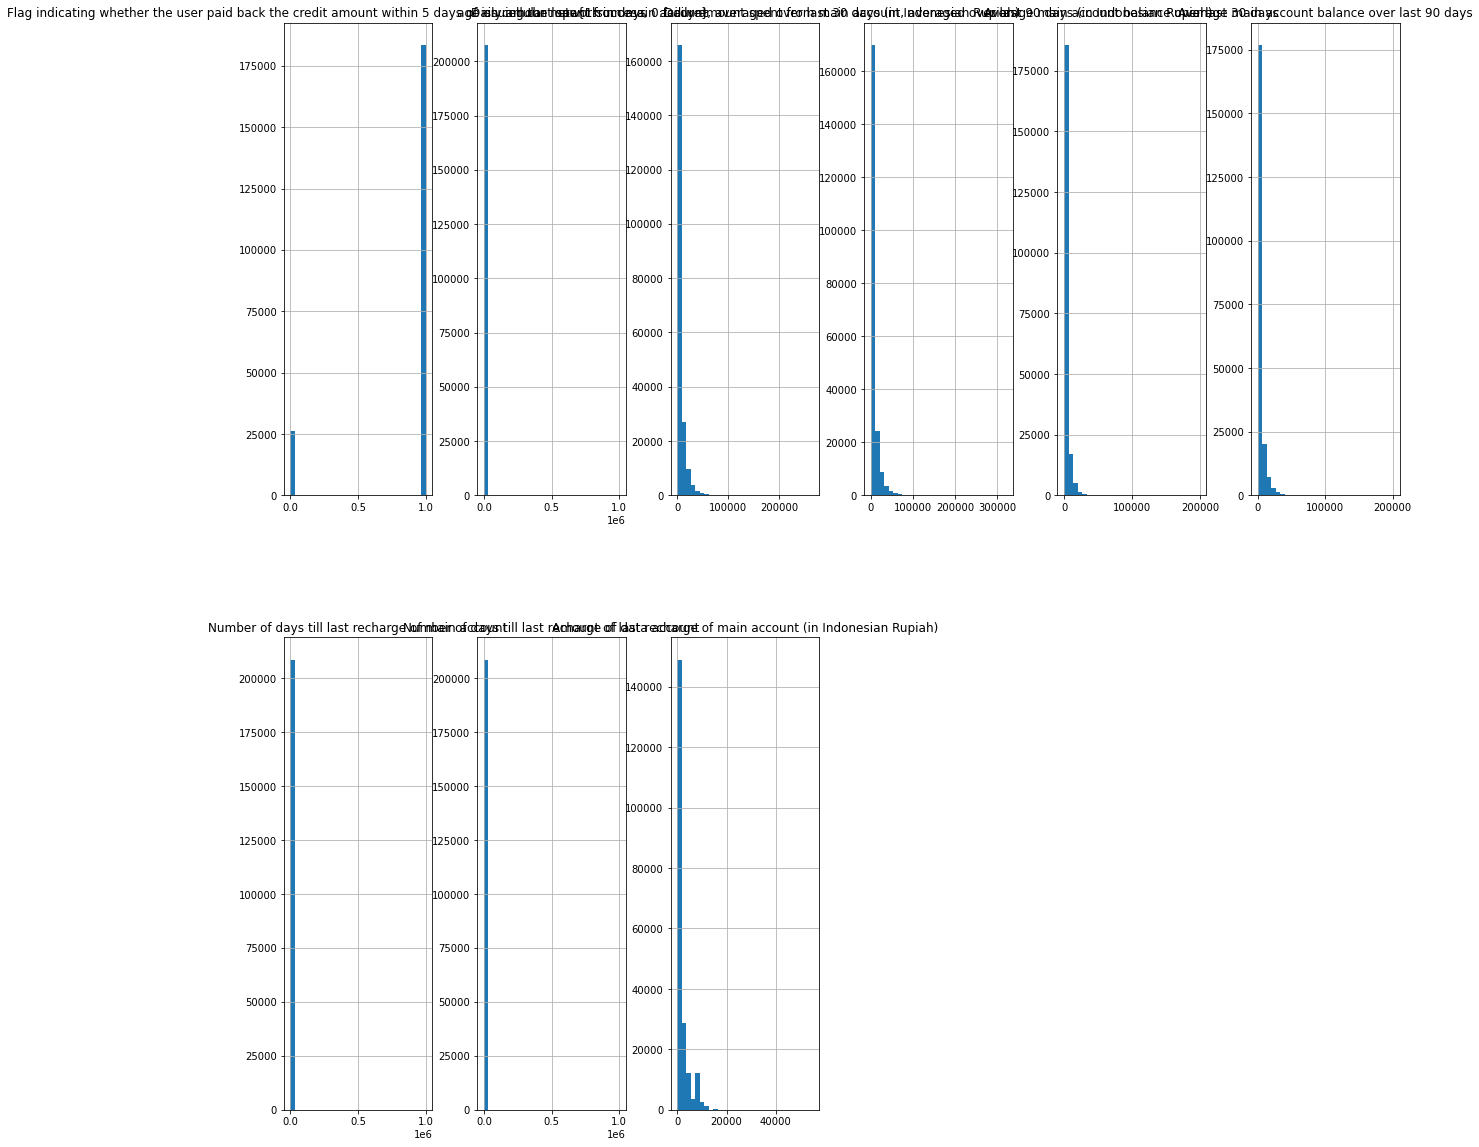

In [26]:
df.iloc[:,0:10].hist(figsize=(20,20),grid=True,layout=(2,6),bins=30)

array([[<AxesSubplot:title={'center':'Number of times main account got recharged in last 30 days'}>,
        <AxesSubplot:title={'center':'Frequency of main account recharged in last 30 days'}>,
        <AxesSubplot:title={'center':'Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)'}>,
        <AxesSubplot:title={'center':'Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)'}>,
        <AxesSubplot:title={'center':'Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)'}>,
        <AxesSubplot:title={'center':'Number of times main account got recharged in last 90 days'}>],
       [<AxesSubplot:title={'center':'Frequency of main account recharged in last 90 days'}>,
        <AxesSubplot:title={'center':'Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)'}>,
        <AxesSubplot:title={'center':'Median of amount of recharge

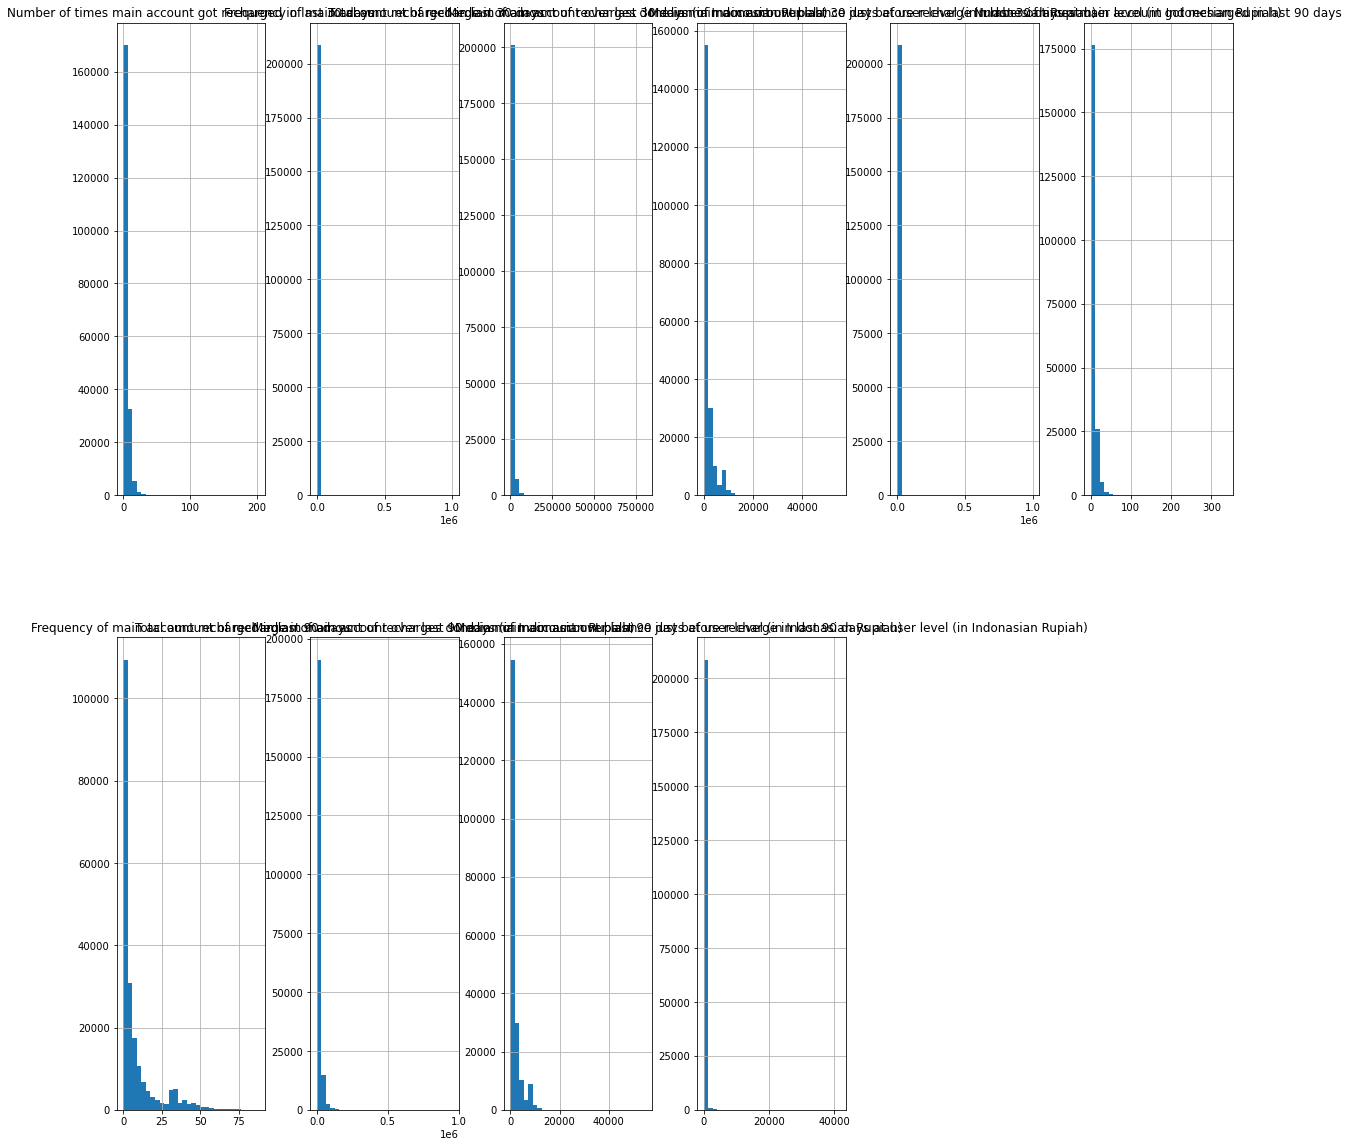

In [27]:
df.iloc[:,10:20].hist(figsize=(20,20),grid=True,layout=(2,6),bins=30)

array([[<AxesSubplot:title={'center':'Number of times data account got recharged in last 30 days'}>,
        <AxesSubplot:title={'center':'Frequency of data account recharged in last 30 days'}>,
        <AxesSubplot:title={'center':'Number of times data account got recharged in last 90 days'}>,
        <AxesSubplot:title={'center':'Frequency of data account recharged in last 90 days'}>,
        <AxesSubplot:title={'center':'Number of loans taken by user in last 30 days'}>,
        <AxesSubplot:title={'center':'Total amount of loans taken by user in last 30 days'}>],
       [<AxesSubplot:title={'center':'maximum amount of loan taken by the user in last 30 days'}>,
        <AxesSubplot:title={'center':'Median of amounts of loan taken by the user in last 30 days'}>,
        <AxesSubplot:title={'center':'Number of loans taken by user in last 90 days'}>,
        <AxesSubplot:title={'center':'Total amount of loans taken by user in last 90 days'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dt

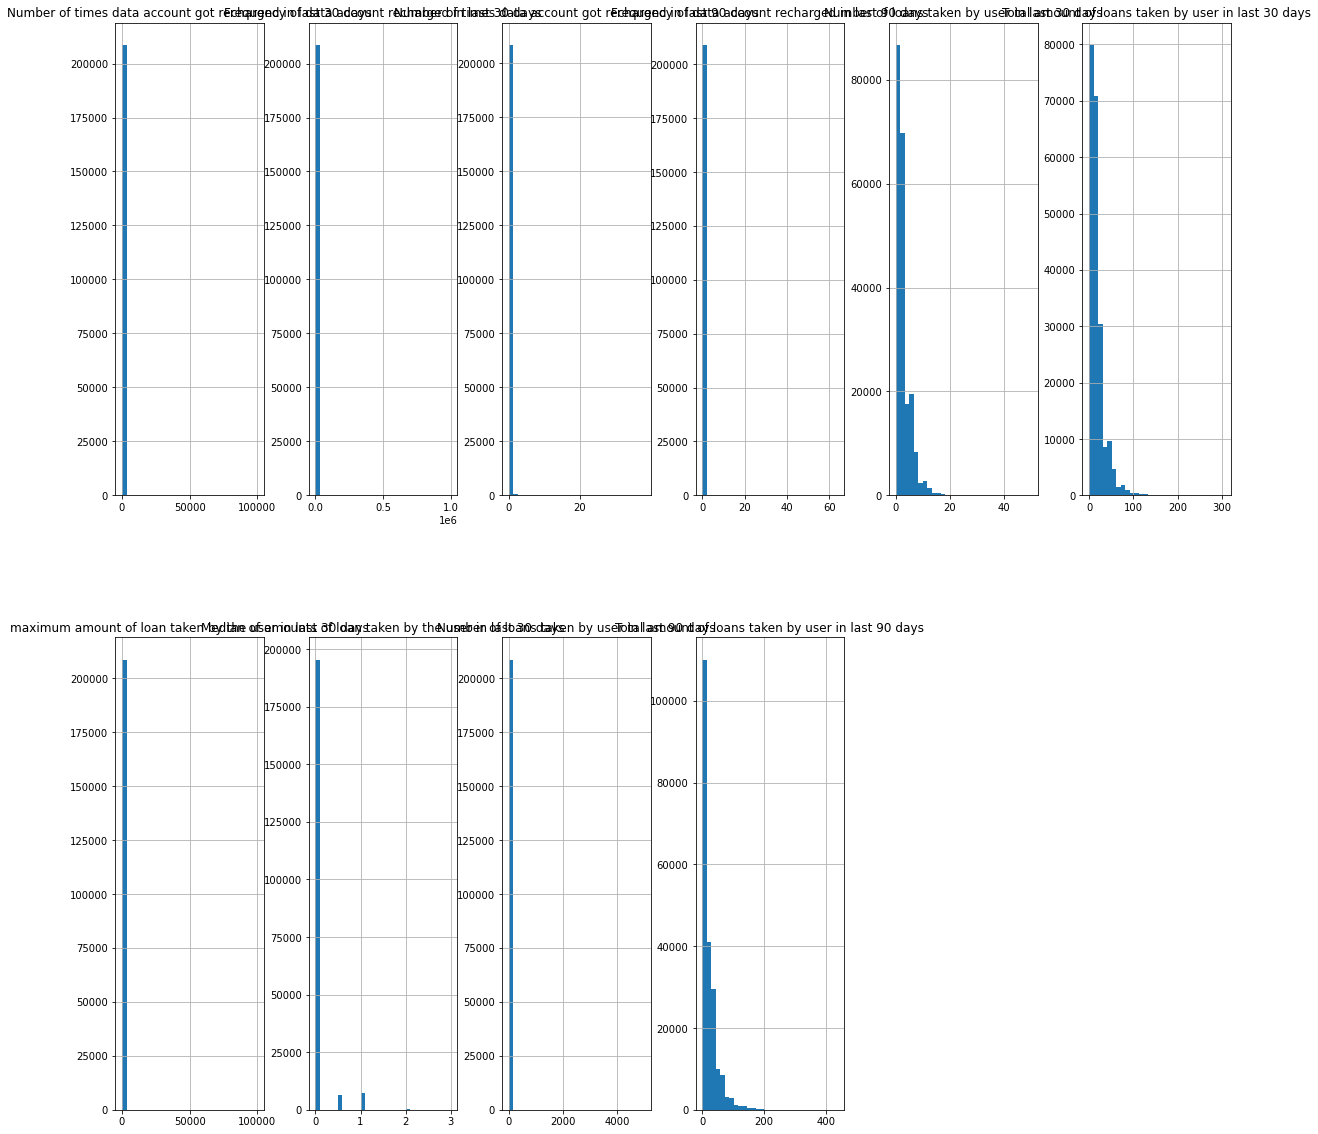

In [28]:
df.iloc[:,20:30].hist(figsize=(20,20),grid=True,layout=(2,6),bins=30)

array([[<AxesSubplot:title={'center':'maximum amount of loan taken by the user in last 90 days'}>,
        <AxesSubplot:title={'center':'Median of amounts of loan taken by the user in last 90 days'}>,
        <AxesSubplot:title={'center':'Average payback time in days over last 30 days'}>,
        <AxesSubplot:title={'center':'Average payback time in days over last 90 days'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

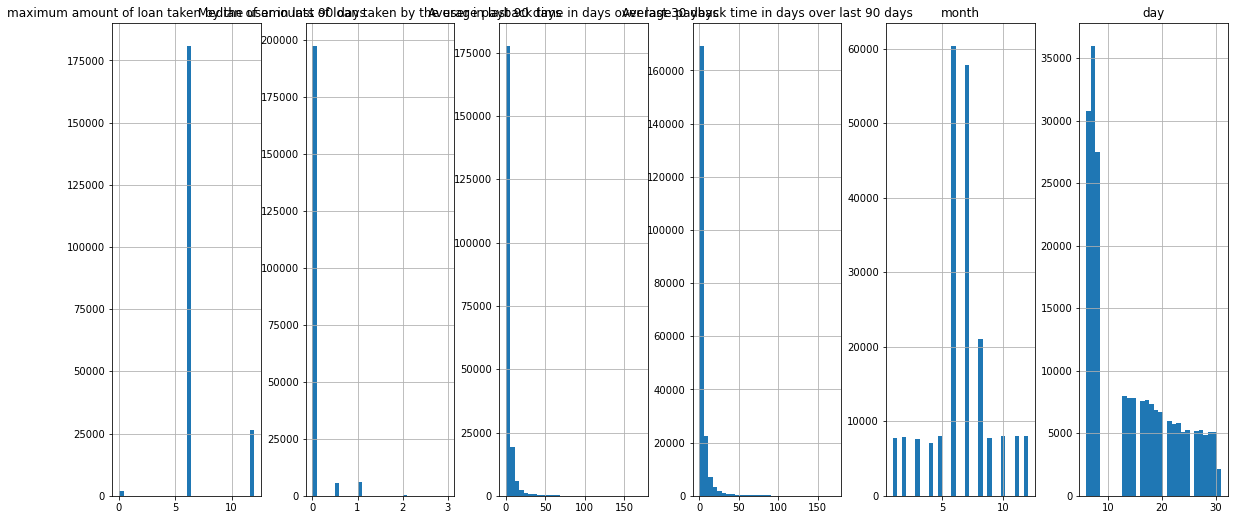

In [29]:
df.iloc[:,30:40].hist(figsize=(20,20),grid=True,layout=(2,6),bins=30)

sns.pairplot(df)

In [30]:
df.skew()

Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}    -2.270254
age on cellular network in days                                                                                         10.392950
Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)                                  3.946238
Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)                                  4.252572
Average main account balance over last 30 days                                                                           4.549979
Average main account balance over last 90 days                                                                           4.458345
Number of days till last recharge of main account                                                                       14.790974
Number of days till last recharge of data account                                         

In [31]:
df.shape

(209593, 36)

# CHECKING OUTLIERS

In [32]:
df1=df.iloc[:,1:34]

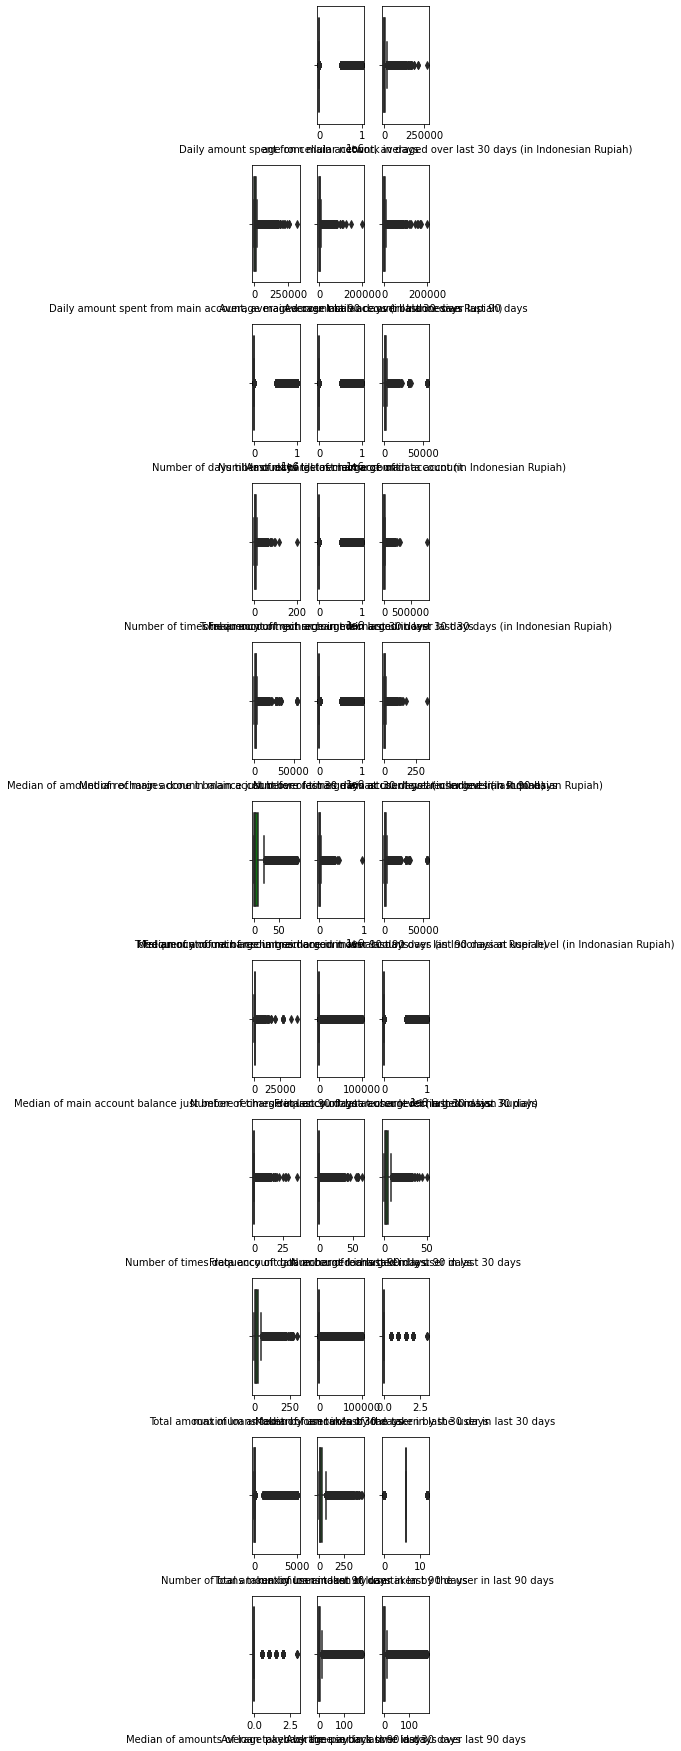

In [33]:
collist=df1.columns.values
ncol=3
nrows=11
plt.figure(figsize=(ncol,8*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color='green',orient='v')
    plt.tight_layout()

<AxesSubplot:>

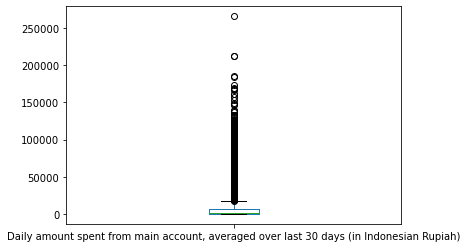

In [34]:
df["Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)"].plot.box()

<AxesSubplot:>

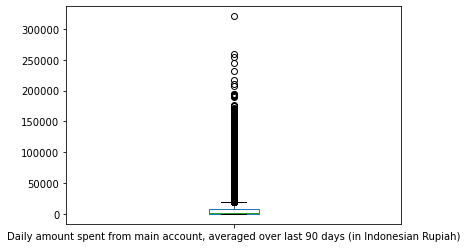

In [35]:
df["Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)"].plot.box()

<AxesSubplot:>

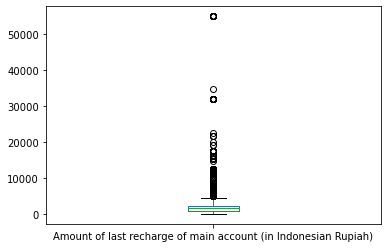

In [36]:
df["Amount of last recharge of main account (in Indonesian Rupiah)"].plot.box()

<AxesSubplot:>

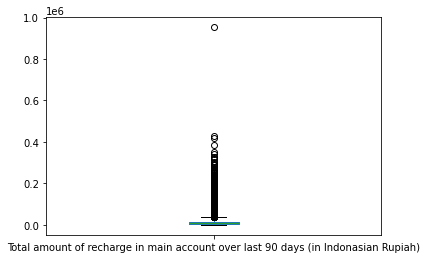

In [37]:
df["Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)"].plot.box()

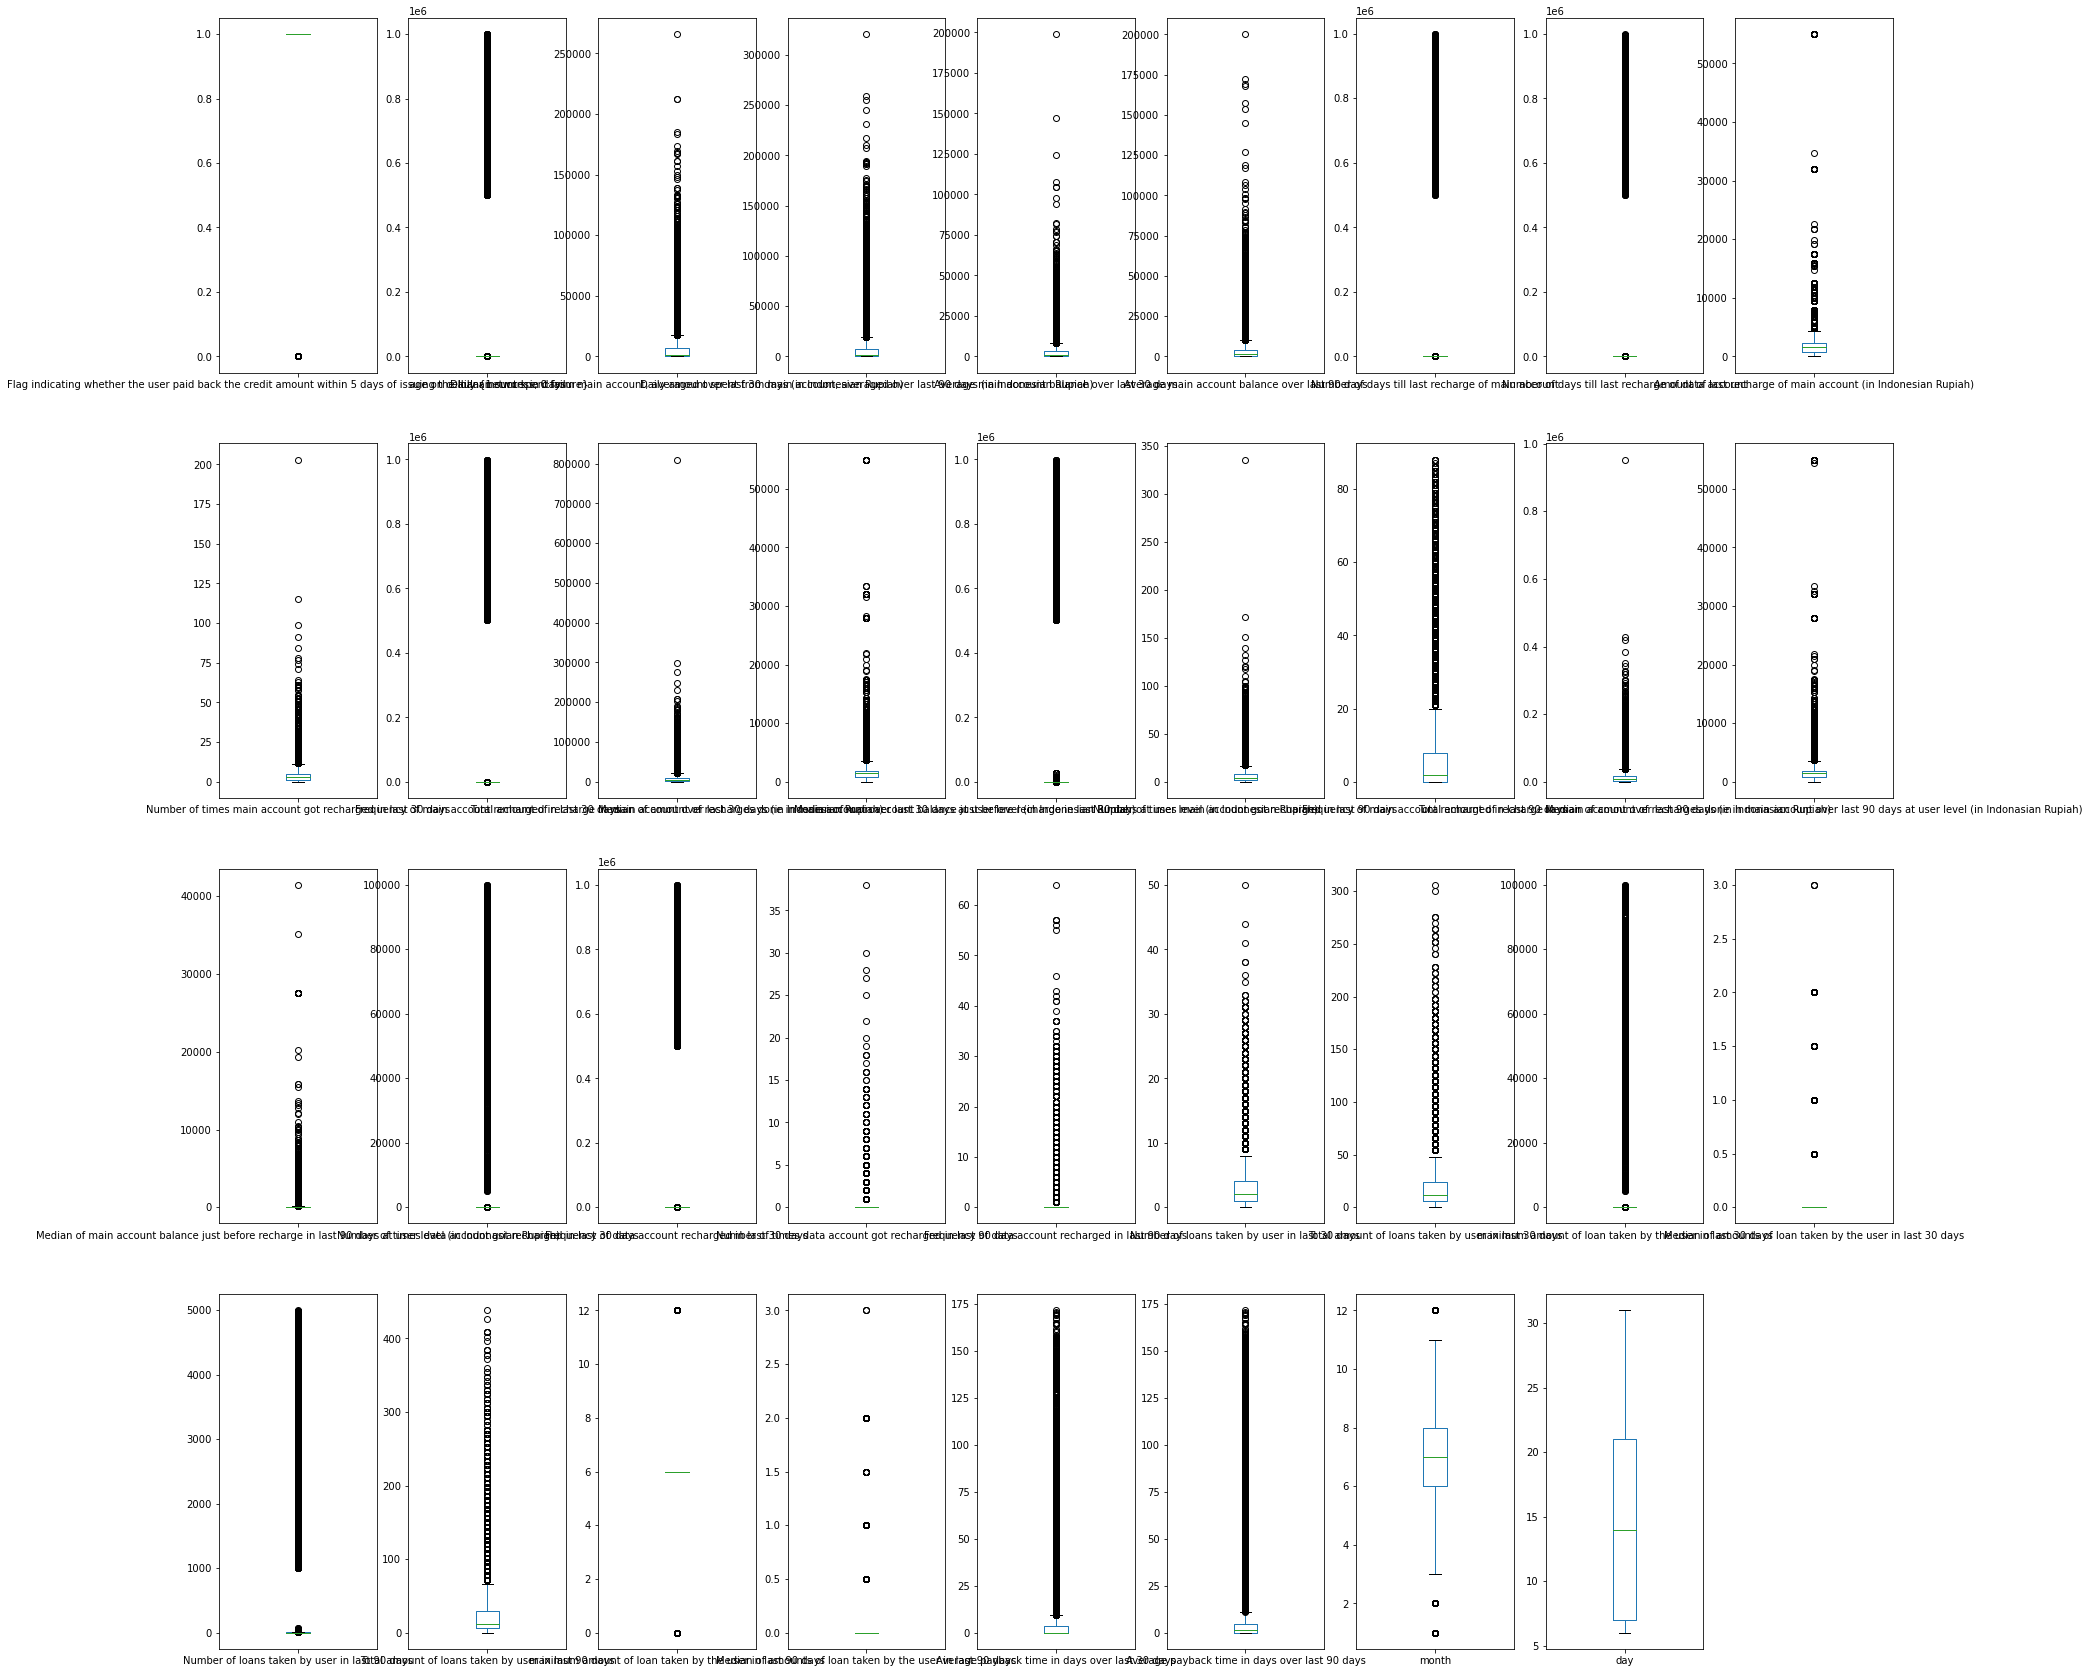

In [38]:
df.plot(kind="box",subplots=True,layout=(4,9),figsize=(30,30))
plt.tight_layout()

# CHECKING SKEWNESS

In [39]:
df.skew()

Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}    -2.270254
age on cellular network in days                                                                                         10.392950
Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)                                  3.946238
Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)                                  4.252572
Average main account balance over last 30 days                                                                           4.549979
Average main account balance over last 90 days                                                                           4.458345
Number of days till last recharge of main account                                                                       14.790974
Number of days till last recharge of data account                                         

<AxesSubplot:xlabel='age on cellular network in days', ylabel='Density'>

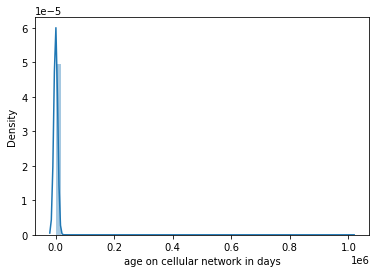

In [40]:
sns.distplot(df['age on cellular network in days'])

<AxesSubplot:xlabel='Number of days till last recharge of main account', ylabel='Density'>

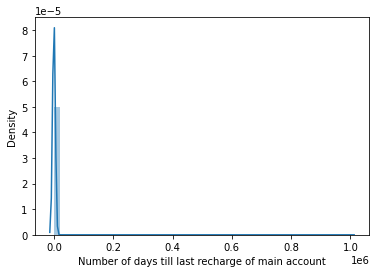

In [41]:
sns.distplot(df['Number of days till last recharge of main account'])

<AxesSubplot:xlabel='Number of days till last recharge of data account', ylabel='Density'>

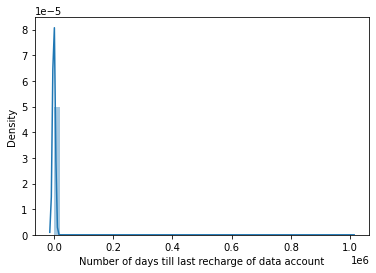

In [42]:
sns.distplot(df['Number of days till last recharge of data account'])

<AxesSubplot:xlabel='Frequency of main account recharged in last 30 days', ylabel='Density'>

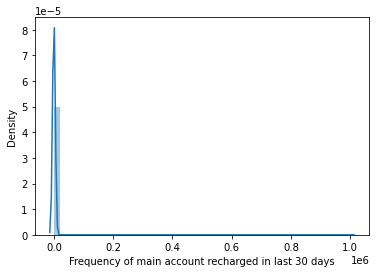

In [43]:
sns.distplot(df['Frequency of main account recharged in last 30 days'])

<AxesSubplot:xlabel='Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)', ylabel='Density'>

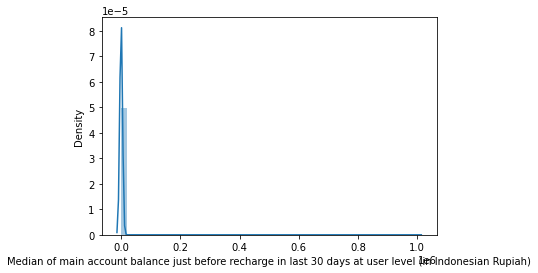

In [44]:
sns.distplot(df['Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)'])

<AxesSubplot:xlabel='Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)', ylabel='Density'>

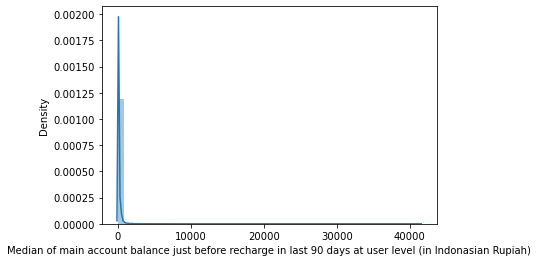

In [45]:
sns.distplot(df['Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)'])

<AxesSubplot:xlabel='Number of times data account got recharged in last 30 days', ylabel='Density'>

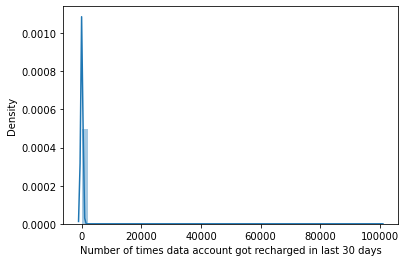

In [46]:
sns.distplot(df['Number of times data account got recharged in last 30 days'])

<AxesSubplot:xlabel='Frequency of data account recharged in last 30 days', ylabel='Density'>

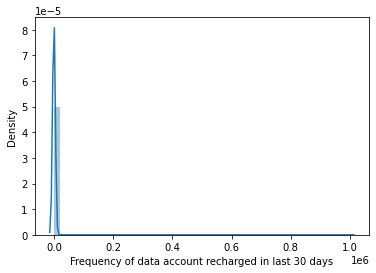

In [47]:
sns.distplot(df['Frequency of data account recharged in last 30 days'])

<AxesSubplot:xlabel='Number of times data account got recharged in last 90 days', ylabel='Density'>

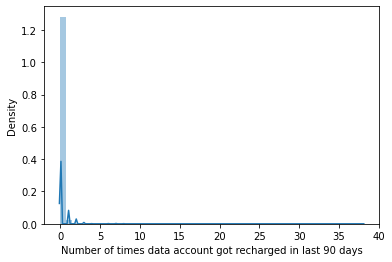

In [48]:
sns.distplot(df['Number of times data account got recharged in last 90 days'])

<AxesSubplot:xlabel='Frequency of data account recharged in last 90 days', ylabel='Density'>

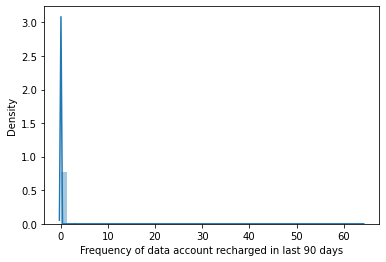

In [49]:
sns.distplot(df['Frequency of data account recharged in last 90 days'])

<AxesSubplot:xlabel='Number of loans taken by user in last 90 days', ylabel='Density'>

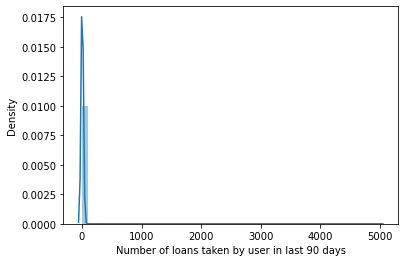

In [50]:
sns.distplot(df['Number of loans taken by user in last 90 days'])

<AxesSubplot:xlabel='Number of times data account got recharged in last 90 days', ylabel='Density'>

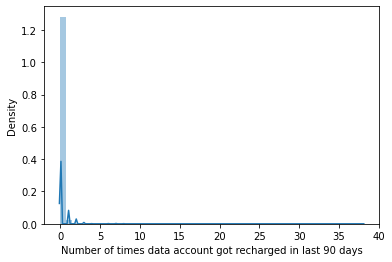

In [51]:
sns.distplot(df['Number of times data account got recharged in last 90 days'])

<AxesSubplot:xlabel='Number of times data account got recharged in last 90 days', ylabel='Density'>

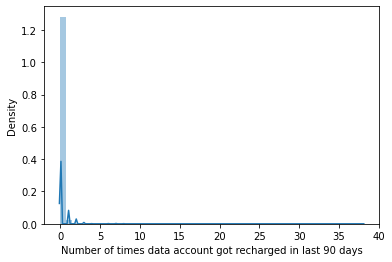

In [52]:
sns.distplot(df['Number of times data account got recharged in last 90 days'])

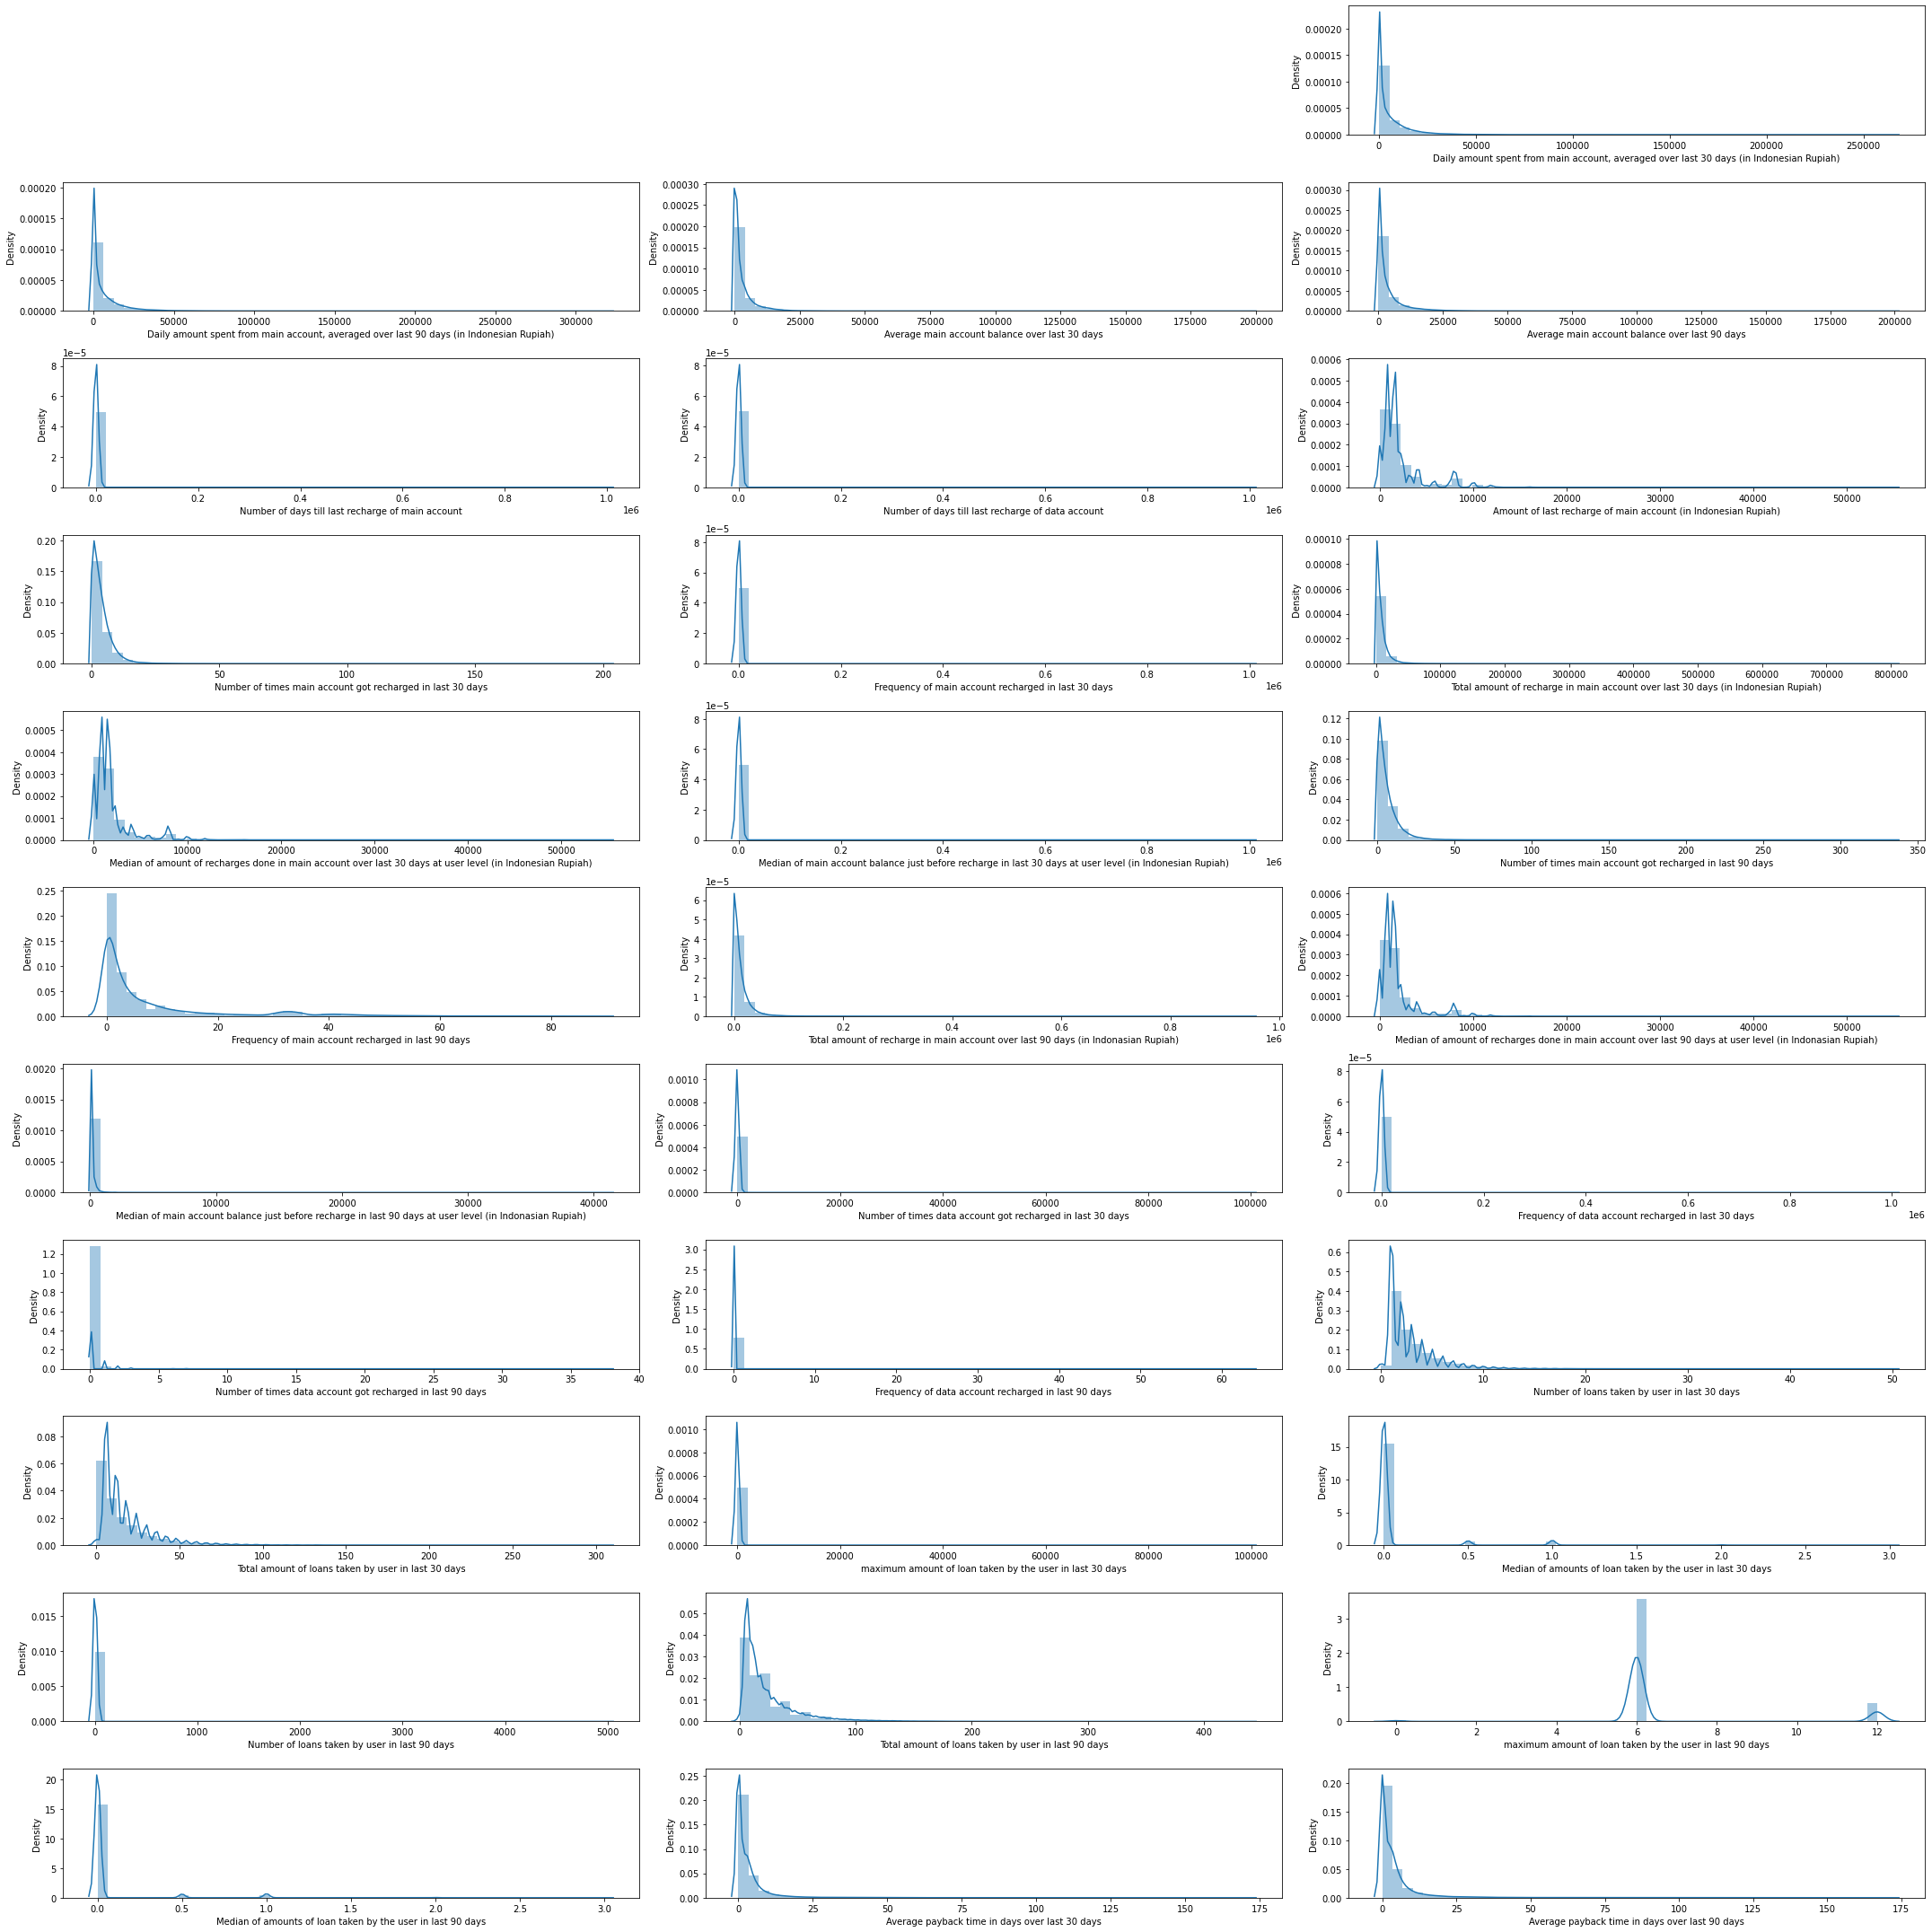

In [53]:
plt.figure(figsize=(30,30))
for i in range(2,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df1[collist[i]])
    plt.tight_layout()

# REMOVING SKEWNESS

In [54]:
import numpy as np
skew=df.iloc[:,2:33]
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [55]:
df.skew()

Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}    -2.270254
age on cellular network in days                                                                                          0.924923
Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)                                 -0.453719
Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)                                 -0.429730
Average main account balance over last 30 days                                                                          -1.320837
Average main account balance over last 90 days                                                                          -1.288806
Number of days till last recharge of main account                                                                        4.361266
Number of days till last recharge of data account                                         

In [56]:
df.shape

(209593, 36)

In [57]:
le=LabelEncoder()
df["mobile number of user"]=le.fit_transform(df["mobile number of user"].astype(str))

# REMOVING OUTLIERS-USING 6 SIGMA RULE SINCE WE ARE NOT SUPPSOE TO LOOSE MORE THAN 7-8% OF DATA

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.984213  , 0.46789578, ..., 2.39409346, 0.16347281,
        0.68096756],
       [0.37765836, 0.91502744, 0.2998416 , ..., 0.41923266, 1.42826341,
        0.82782543],
       [0.37765836, 1.10692885, 0.07164414, ..., 0.41923266, 0.58506967,
        0.55523481],
       ...,
       [0.37765836, 0.7274342 , 0.58148384, ..., 0.04735622, 0.16347281,
        1.8125623 ],
       [0.37765836, 0.34017702, 1.01009381, ..., 0.59938541, 0.16347281,
        1.3096313 ],
       [0.37765836, 0.52386948, 0.93718817, ..., 0.41923266, 0.16347281,
        0.95355818]])

In [59]:
threshold=6
print(np.where(z>6))

(array([    30,     53,     65, ..., 209533, 209568, 209580], dtype=int64), array([ 7,  7,  2, ...,  7, 22, 30], dtype=int64))


In [60]:
df=df[(z<6).all(axis=1)]
df

,"Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}",mobile number of user,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Amount of last recharge of main account (in Indonesian Rupiah),...,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Average payback time in days over last 30 days,Average payback time in days over last 90 days,month,day
0,0,40191,5.609472,8.024879,8.028178,5.398751,5.565018,1.098612,0.000000,7.339538,...,1.945910,0.0,1.098612,2.564949,1.945910,0.0,3.401197,29.000000,7,20
1,1,142291,6.569481,9.402860,9.403087,8.213994,8.213994,3.044522,0.000000,8.663542,...,2.564949,0.0,0.693147,2.564949,2.564949,0.0,0.000000,0.000000,10,8
2,1,33594,6.284134,7.243513,7.243513,6.803650,6.803650,1.386294,0.000000,7.339538,...,1.945910,0.0,0.693147,1.945910,1.945910,0.0,0.000000,0.000000,8,19
3,1,104157,5.488938,3.101353,3.101353,5.077795,5.077795,3.737670,0.000000,6.854355,...,1.945910,0.0,1.098612,2.564949,1.945910,0.0,0.000000,0.000000,6,6
4,1,6910,6.854355,5.021373,5.021373,7.002975,7.002975,1.609438,0.000000,7.745003,...,1.945910,0.0,2.079442,3.761200,1.945910,0.0,1.203973,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,42866,6.003887,5.029603,5.029603,6.994107,6.994107,0.693147,0.000000,8.306225,...,1.945910,0.0,1.098612,2.564949,1.945910,0.0,0.693147,1.000000,6,17
209589,1,178248,6.981006,3.635901,3.635901,7.455507,7.455507,1.609438,0.000000,6.651572,...,1.945910,0.0,1.386294,2.944439,1.945910,0.0,0.693147,1.000000,12,6
209590,1,53995,6.921658,9.379586,9.384743,8.676388,9.093155,1.386294,0.000000,7.339538,...,2.564949,0.0,1.945910,4.007333,2.564949,0.0,1.609438,3.833333,7,29
209591,1,111388,7.457609,9.432622,9.439495,6.023036,6.893230,1.098612,3.663562,6.651572,...,2.564949,0.0,1.386294,3.218876,2.564949,0.0,0.000000,10.500000,7,25


In [61]:
x=df.iloc[:,1:-1]
y=df.iloc[:,0]

In [62]:
x

,mobile number of user,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Amount of last recharge of main account (in Indonesian Rupiah),Number of times main account got recharged in last 30 days,...,Total amount of loans taken by user in last 30 days,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Average payback time in days over last 30 days,Average payback time in days over last 90 days,month
0,40191,5.609472,8.024879,8.028178,5.398751,5.565018,1.098612,0.000000,7.339538,1.098612,...,2.564949,1.945910,0.0,1.098612,2.564949,1.945910,0.0,3.401197,29.000000,7
1,142291,6.569481,9.402860,9.403087,8.213994,8.213994,3.044522,0.000000,8.663542,0.693147,...,2.564949,2.564949,0.0,0.693147,2.564949,2.564949,0.0,0.000000,0.000000,10
2,33594,6.284134,7.243513,7.243513,6.803650,6.803650,1.386294,0.000000,7.339538,0.693147,...,1.945910,1.945910,0.0,0.693147,1.945910,1.945910,0.0,0.000000,0.000000,8
3,104157,5.488938,3.101353,3.101353,5.077795,5.077795,3.737670,0.000000,6.854355,0.000000,...,2.564949,1.945910,0.0,1.098612,2.564949,1.945910,0.0,0.000000,0.000000,6
4,6910,6.854355,5.021373,5.021373,7.002975,7.002975,1.609438,0.000000,7.745003,2.079442,...,3.761200,1.945910,0.0,2.079442,3.761200,1.945910,0.0,1.203973,2.333333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,6.003887,5.029603,5.029603,6.994107,6.994107,0.693147,0.000000,8.306225,1.386294,...,2.564949,1.945910,0.0,1.098612,2.564949,1.945910,0.0,0.693147,1.000000,6
209589,178248,6.981006,3.635901,3.635901,7.455507,7.455507,1.609438,0.000000,6.651572,1.609438,...,2.944439,1.945910,0.0,1.386294,2.944439,1.945910,0.0,0.693147,1.000000,12
209590,53995,6.921658,9.379586,9.384743,8.676388,9.093155,1.386294,0.000000,7.339538,1.791759,...,3.761200,2.564949,0.0,1.945910,4.007333,2.564949,0.0,1.609438,3.833333,7
209591,111388,7.457609,9.432622,9.439495,6.023036,6.893230,1.098612,3.663562,6.651572,1.791759,...,2.944439,2.564949,0.0,1.386294,3.218876,2.564949,0.0,0.000000,10.500000,7


In [63]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}, Length: 197239, dtype: int64

# REGULARIZING DATA

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(x)
x.loc[:,:]=scaled_values

In [65]:
x

,mobile number of user,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Amount of last recharge of main account (in Indonesian Rupiah),Number of times main account got recharged in last 30 days,...,Total amount of loans taken by user in last 30 days,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Average payback time in days over last 30 days,Average payback time in days over last 90 days,month
0,0.215800,0.409545,0.642454,0.633235,0.442495,0.455894,0.231961,0.000000,0.672420,0.206579,...,0.447882,0.758654,0.0,0.113147,0.149577,0.0,0.0,0.808905,0.439394,0.545455
1,0.764011,0.479635,0.752772,0.741683,0.673240,0.672902,0.642820,0.000000,0.793720,0.130337,...,0.447882,1.000000,0.0,0.000000,0.149577,1.0,0.0,0.000000,0.000000,0.818182
2,0.180378,0.458802,0.579900,0.571343,0.557644,0.557365,0.292702,0.000000,0.672420,0.130337,...,0.339787,0.758654,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.636364
3,0.559256,0.400745,0.248287,0.244624,0.416189,0.415980,0.789171,0.000000,0.627970,0.000000,...,0.447882,0.758654,0.0,0.113147,0.149577,0.0,0.0,0.000000,0.000000,0.454545
4,0.037102,0.500434,0.402000,0.396068,0.573982,0.573694,0.339816,0.000000,0.709567,0.391011,...,0.656766,0.758654,0.0,0.386853,0.438625,0.0,0.0,0.286340,0.035354,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.230163,0.438341,0.402659,0.396718,0.573255,0.572967,0.146351,0.000000,0.760984,0.260674,...,0.447882,0.758654,0.0,0.113147,0.149577,0.0,0.0,0.164851,0.015152,0.454545
209589,0.957077,0.509680,0.291082,0.286787,0.611072,0.610766,0.339816,0.000000,0.609391,0.302633,...,0.514147,0.758654,0.0,0.193426,0.241273,0.0,0.0,0.164851,0.015152,1.000000
209590,0.289918,0.505347,0.750909,0.740236,0.711139,0.744924,0.292702,0.000000,0.672420,0.336916,...,0.656766,1.000000,0.0,0.349590,0.498098,1.0,0.0,0.382772,0.058081,0.545455
209591,0.598082,0.544477,0.755155,0.744554,0.493663,0.564703,0.231961,0.770694,0.609391,0.336916,...,0.514147,1.000000,0.0,0.193426,0.307584,1.0,0.0,0.000000,0.159091,0.545455


In [66]:
x.shape

(197239, 34)

In [67]:
y.shape

(197239,)

In [68]:
y.value_counts()

1    172331
0     24908
Name: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}, dtype: int64

# RESAMPLING THE IMBALANCED DATA

In [69]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [70]:
y.value_counts()

1    172331
0    172331
Name: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}, dtype: int64

In [71]:
x.shape

(344662, 34)

In [72]:
y.shape

(344662,)

# Define the independent and dependent variable & Start modelling with different models

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=40)

In [74]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((241263, 34), (103399, 34), (241263,), (103399,))

# LOGISTICS REGRESSION

In [75]:
LG=LogisticRegression()

In [76]:
LG.fit(x_train,y_train)

LogisticRegression()

In [77]:
LG.fit(x_train,y_train)
LG.score(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))

0.7727347459840037
[[40102 11518]
 [11981 39798]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     51620
           1       0.78      0.77      0.77     51779

    accuracy                           0.77    103399
   macro avg       0.77      0.77      0.77    103399
weighted avg       0.77      0.77      0.77    103399



In [78]:
score=cross_val_score(LG,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77016813 0.7724312  0.7740672  0.77141241 0.77482156]
0.7725801003907167
0.0016993452771301588


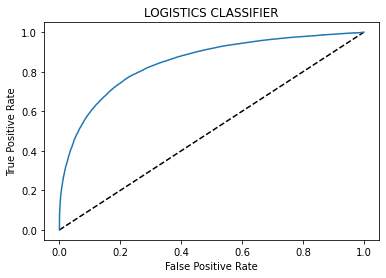

In [79]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=LG.predict_proba(x_test)[:,-1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="LOGISTICS CLASSIFIER")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LOGISTICS CLASSIFIER")
plt.show()

# DECISION TREE CLASSIFIER 

In [80]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9002794998017389
[[47028  4592]
 [ 5719 46060]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     51620
           1       0.91      0.89      0.90     51779

    accuracy                           0.90    103399
   macro avg       0.90      0.90      0.90    103399
weighted avg       0.90      0.90      0.90    103399



In [81]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.82616454 0.91736904 0.92138629 0.9152353  0.92135728]
0.9003024907631403
0.0371443754579402


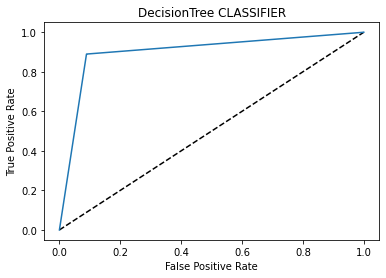

In [82]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc.predict_proba(x_test)[:,-1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="DecisionTree CLASSIFIER")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DecisionTree CLASSIFIER")
plt.show()

# RANDOM FOREST CLASSIFIER

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9468273387556939
[[48697  2923]
 [ 2575 49204]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     51620
           1       0.94      0.95      0.95     51779

    accuracy                           0.95    103399
   macro avg       0.95      0.95      0.95    103399
weighted avg       0.95      0.95      0.95    103399



In [84]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.85182714 0.96905691 0.968099   0.96734463 0.96878083]
0.9450216999824557
0.046601049168979385


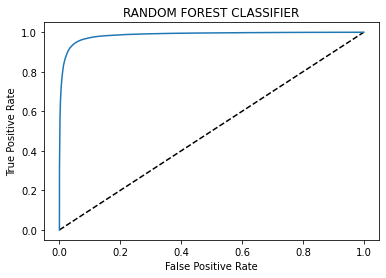

In [85]:
y_pred_prob=rf.predict_proba(x_test)[:,-1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RANDOM FOREST CLASSIFIER")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RANDOM FOREST CLASSIFIER")
plt.show()

# ADABOOST CLASSIFIER

In [86]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8473002640257643
[[43817  7803]
 [ 7986 43793]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     51620
           1       0.85      0.85      0.85     51779

    accuracy                           0.85    103399
   macro avg       0.85      0.85      0.85    103399
weighted avg       0.85      0.85      0.85    103399



In [87]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79565665 0.86037167 0.86002147 0.85706203 0.85894795]
0.8464119537273913
0.02540381259982374


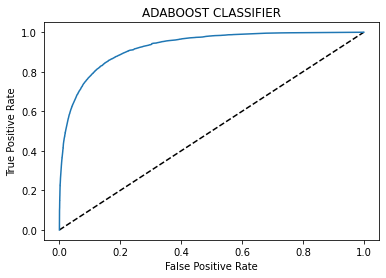

In [88]:
y_pred_prob=ad.predict_proba(x_test)[:,-1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="ADABOOST CLASSIFIER")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ADABOOST CLASSIFIER")
plt.show()

# GRADIENTBOOSTING CLASSIFIER

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8934805945898896
[[46545  5075]
 [ 5939 45840]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     51620
           1       0.90      0.89      0.89     51779

    accuracy                           0.89    103399
   macro avg       0.89      0.89      0.89    103399
weighted avg       0.89      0.89      0.89    103399



In [90]:
score=cross_val_score(gb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81500878 0.91062336 0.90693727 0.9063715  0.90795277]
0.8893787337314004
0.03721364129874501


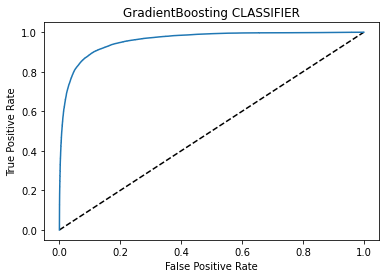

In [91]:
y_pred_prob=gb.predict_proba(x_test)[:,-1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="GradientBoosting CLASSIFIER")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GradientBoosting CLASSIFIER")
plt.show()

# PREDICTIONS

In [119]:
df2=x.iloc[0:10,:]

In [120]:
df2

,mobile number of user,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Average main account balance over last 30 days,Average main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Amount of last recharge of main account (in Indonesian Rupiah),Number of times main account got recharged in last 30 days,...,Total amount of loans taken by user in last 30 days,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Average payback time in days over last 30 days,Average payback time in days over last 90 days,month
0,0.215800,0.409545,0.642454,0.633235,0.442495,0.455894,0.231961,0.000000,0.672420,0.206579,...,0.447882,0.758654,0.0,0.113147,0.149577,0.0,0.0,0.808905,0.439394,0.545455
1,0.764011,0.479635,0.752772,0.741683,0.673240,0.672902,0.642820,0.000000,0.793720,0.130337,...,0.447882,1.000000,0.0,0.000000,0.149577,1.0,0.0,0.000000,0.000000,0.818182
2,0.180378,0.458802,0.579900,0.571343,0.557644,0.557365,0.292702,0.000000,0.672420,0.130337,...,0.339787,0.758654,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.636364
3,0.559256,0.400745,0.248287,0.244624,0.416189,0.415980,0.789171,0.000000,0.627970,0.000000,...,0.447882,0.758654,0.0,0.113147,0.149577,0.0,0.0,0.000000,0.000000,0.454545
4,0.037102,0.500434,0.402000,0.396068,0.573982,0.573694,0.339816,0.000000,0.709567,0.391011,...,0.656766,0.758654,0.0,0.386853,0.438625,0.0,0.0,0.286340,0.035354,0.454545
5,0.364622,0.463164,0.618238,0.609259,0.484493,0.486871,0.231961,0.000000,0.672420,0.302633,...,0.514147,0.758654,0.0,0.193426,0.241273,0.0,0.0,0.590984,0.126263,0.090909
6,0.968949,0.460152,0.637638,0.628430,0.476968,0.491624,0.557210,0.000000,0.793720,0.130337,...,0.339787,0.758654,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.363636
7,0.098673,0.485155,0.757783,0.771984,0.557664,0.642583,0.339816,0.846802,0.738822,0.260674,...,0.514147,0.758654,0.0,0.386853,0.438625,0.0,0.0,0.462795,0.058442,0.363636
8,0.598742,0.517155,0.361739,0.356401,0.634034,0.633716,0.146351,0.000000,0.672420,0.302633,...,0.562068,0.758654,0.0,0.255696,0.307584,0.0,0.0,0.309008,0.040404,0.454545
9,0.564572,0.458938,0.273240,0.269209,0.526194,0.525930,0.524663,0.000000,0.609391,0.130337,...,0.339787,0.758654,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.636364


In [121]:
actual_res=y.iloc[0:10]
actual_res

0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}, dtype: int64

In [124]:
pred=rf.predict(df2)
print("Print result price",pred)
print("actual price",actual_res)

Print result price [0 1 1 1 1 1 1 1 1 1]
actual price 0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}, dtype: int64


In [127]:
pred=rf.predict(x_test)
print("Print result price",pred)
print("actual price",y_test)

Print result price [1 0 1 ... 0 1 0]
actual price 31855     1
311240    0
136199    1
259152    0
200873    0
         ..
322326    0
57775     1
324985    0
136437    1
236458    0
Name: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}, Length: 103399, dtype: int64


In [128]:
y_test

31855     1
311240    0
136199    1
259152    0
200873    0
         ..
322326    0
57775     1
324985    0
136437    1
236458    0
Name: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}, Length: 103399, dtype: int64

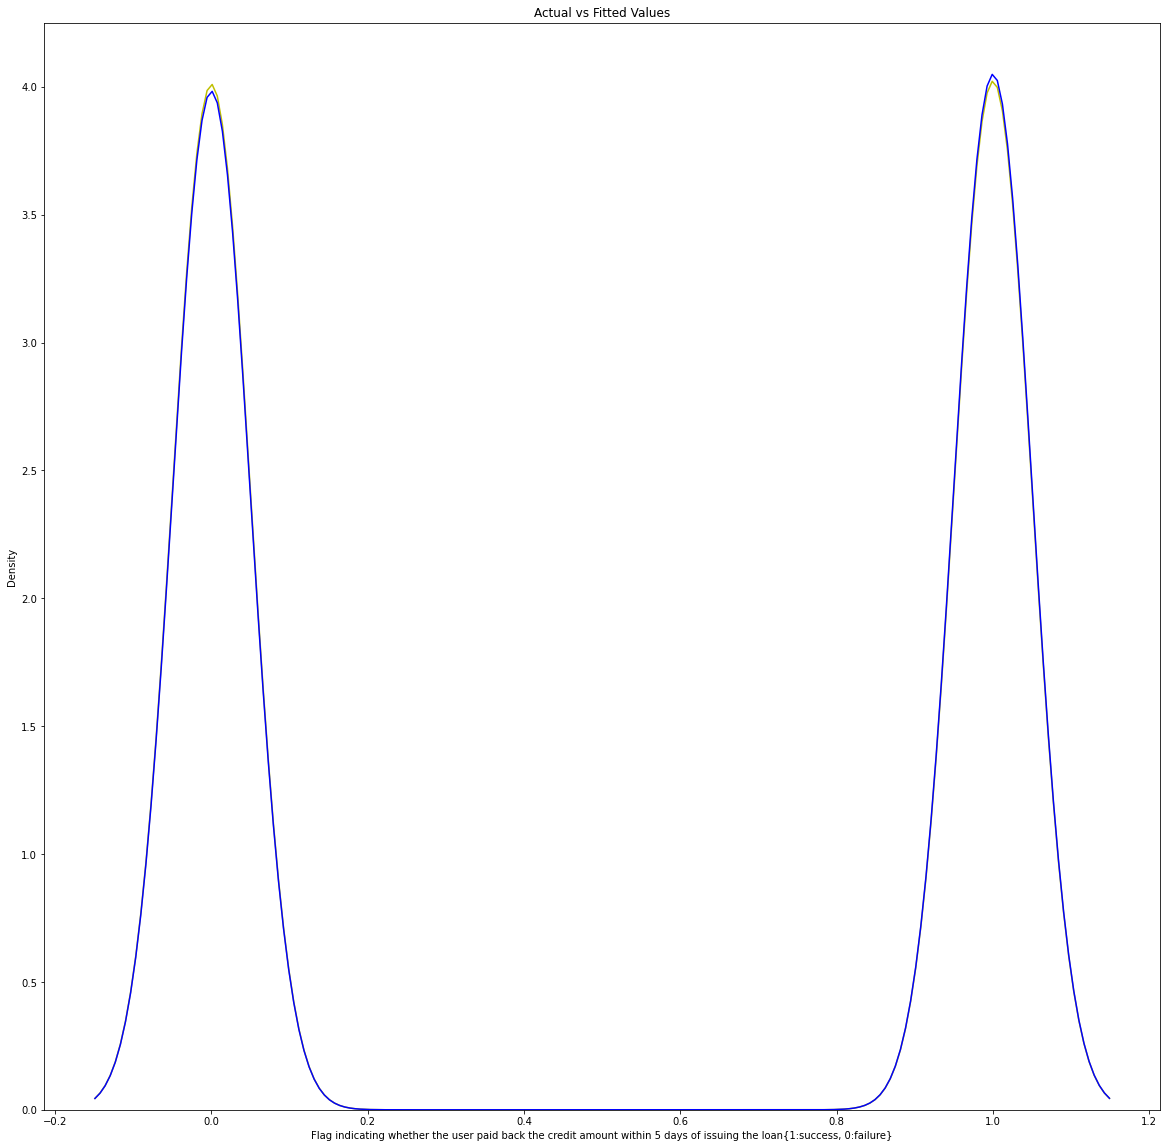

In [147]:
import seaborn as sns
plt.figure(figsize=(20, 20))
ax=sns.distplot(y_test, hist=False, color="y", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values", ax=ax)
plt.title('Actual vs Fitted Values')
plt.show()
plt.close()